In [2]:
!pip install numpy matplotlib scipy pandas plotly seaborn

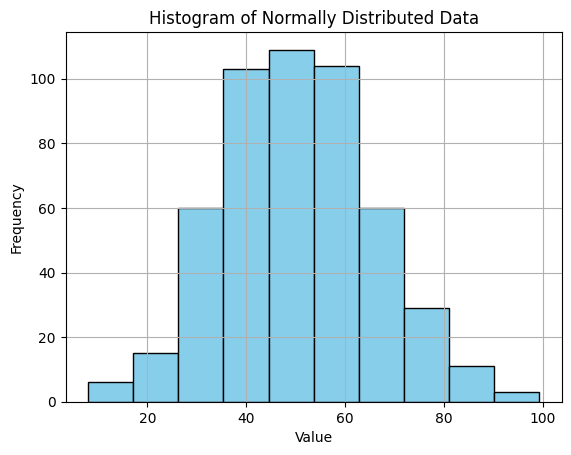

In [3]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.normal(loc=50, scale=15, size=500)
plt.hist(data, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Normally Distributed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [4]:
from scipy.stats import skew
skew_value = skew(data)
print(f"Skewness: {skew_value:.2f}")

Skewness: 0.16


In [5]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
'X': np.random.randint(20, 100, 100),
'Y': np.random.randint(30, 120, 100)
})
correlation = df.corr()
print(correlation)

         X        Y
X  1.00000 -0.08039
Y -0.08039  1.00000


In [2]:
import pandas as pd #data analysis and manipulation.
import numpy as np # maths equation 
import plotly.graph_objects as go 
import plotly.express as px
import plotly.offline as py
from scipy.stats import norm , skew
import seaborn as sns #matplotlib and pandas

In [3]:
df = sns.load_dataset('planets').dropna()
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 784
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          498 non-null    object 
 1   number          498 non-null    int64  
 2   orbital_period  498 non-null    float64
 3   mass            498 non-null    float64
 4   distance        498 non-null    float64
 5   year            498 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 27.2+ KB


In [5]:
#selecting only numeric columns for futher processing

numeric_cols = df.select_dtypes(include='number').columns

In [6]:
corr_matrix = df[numeric_cols].corr()
corr_matrix

,number,orbital_period,mass,distance,year
number,1.000000,-0.059435,-0.249915,-0.288808,0.110399
orbital_period,-0.059435,1.000000,0.184906,-0.035069,0.070186
mass,-0.249915,0.184906,1.000000,0.274082,-0.137946
distance,-0.288808,-0.035069,0.274082,1.000000,0.193087
year,0.110399,0.070186,-0.137946,0.193087,1.000000


In [7]:
print(numeric_cols)

Index(['number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')


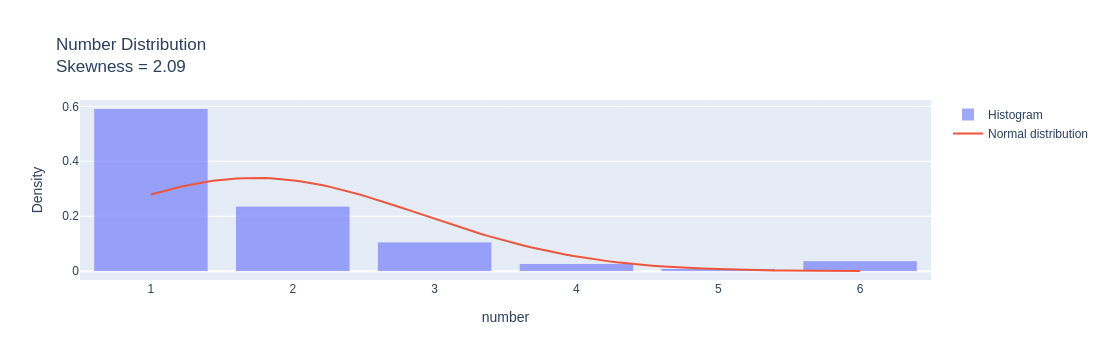

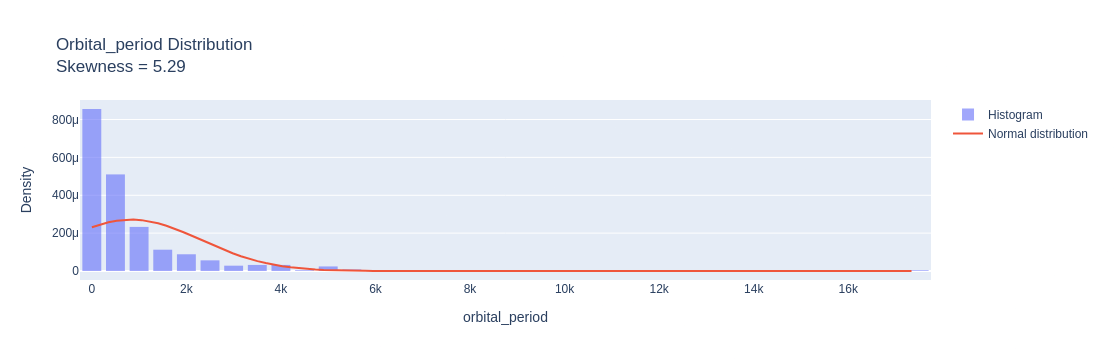

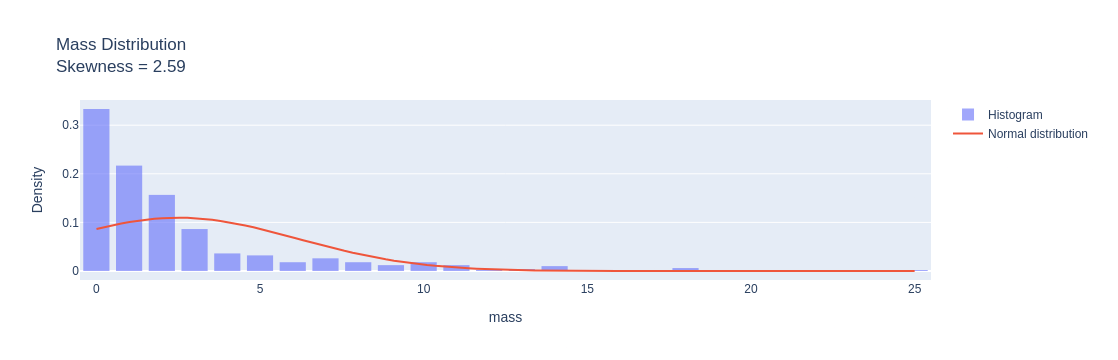

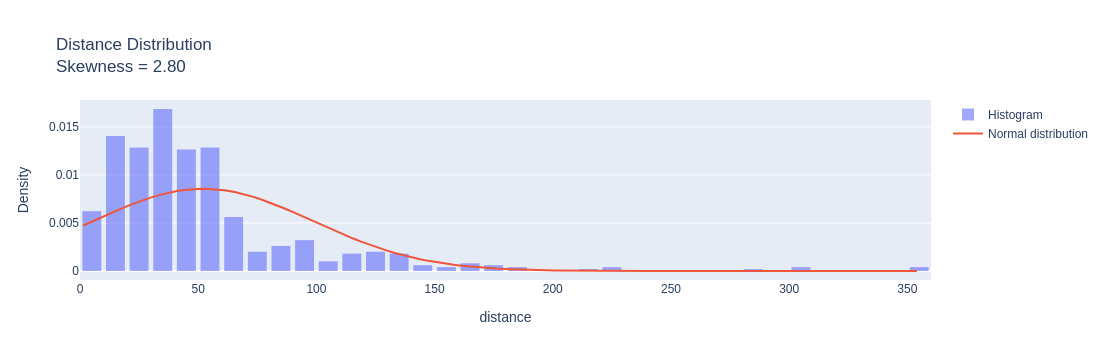

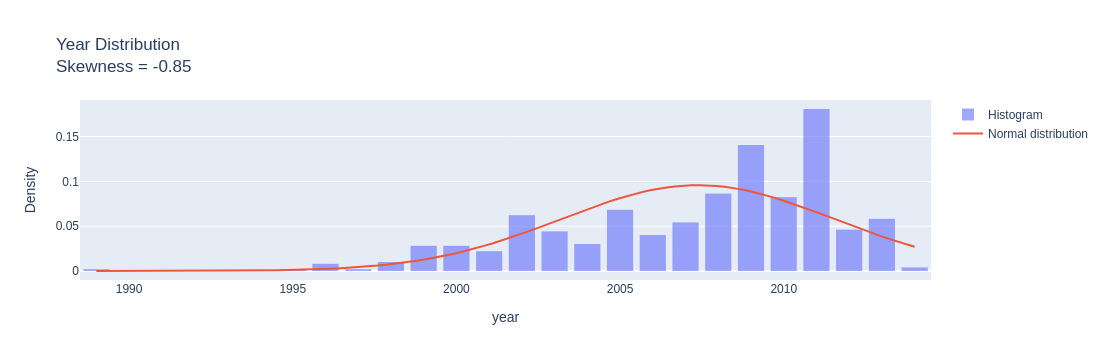

In [8]:
for col in numeric_cols:
    x = df[col]
    mean, std = x.mean(), x.std()

    # plotting histogram with density curve (mix of normal distribution and ...)
    hist = go.Histogram(x=x, histnorm='probability density', name='Histogram', opacity=0.6)
    x_range = np.linspace(x.min(), x.max(), 100)

    normal_curve = go.Scatter(
        x=x_range,
        y=norm.pdf(x_range, mean, std),mode='lines',name='Normal distribution'
    )

    layout = go.Layout(
        title=f'{col.capitalize()} Distribution<br>Skewness = {x.skew():.2f}',
        xaxis_title=col,
        yaxis_title='Density',
        bargap=0.2
       
    )

    fig = go.Figure(data=[hist, normal_curve], layout=layout)
    fig.show()

In [9]:
corr_matrix = df[numeric_cols].corr()
corr_matrix

,number,orbital_period,mass,distance,year
number,1.000000,-0.059435,-0.249915,-0.288808,0.110399
orbital_period,-0.059435,1.000000,0.184906,-0.035069,0.070186
mass,-0.249915,0.184906,1.000000,0.274082,-0.137946
distance,-0.288808,-0.035069,0.274082,1.000000,0.193087
year,0.110399,0.070186,-0.137946,0.193087,1.000000


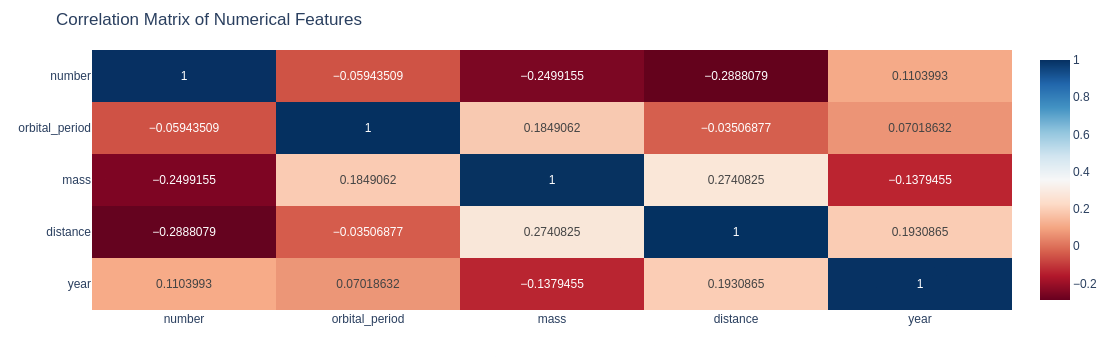

In [10]:
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu',
    title='Correlation Matrix of Numerical Features',
    aspect="auto"
)

fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
fig.show()

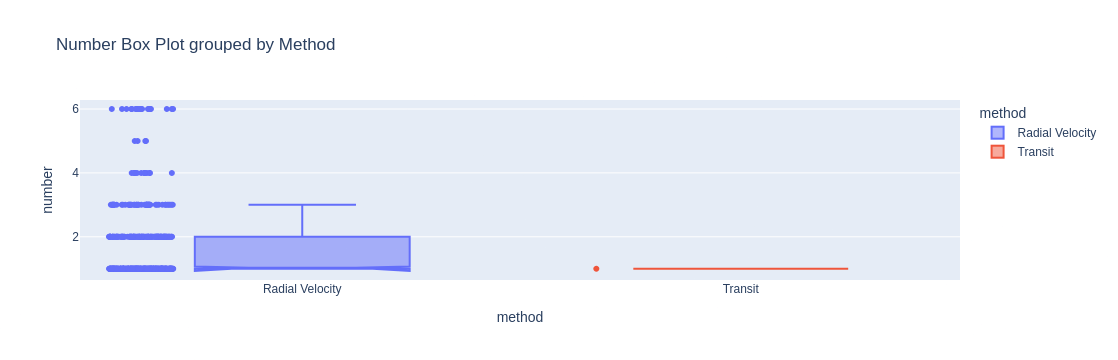

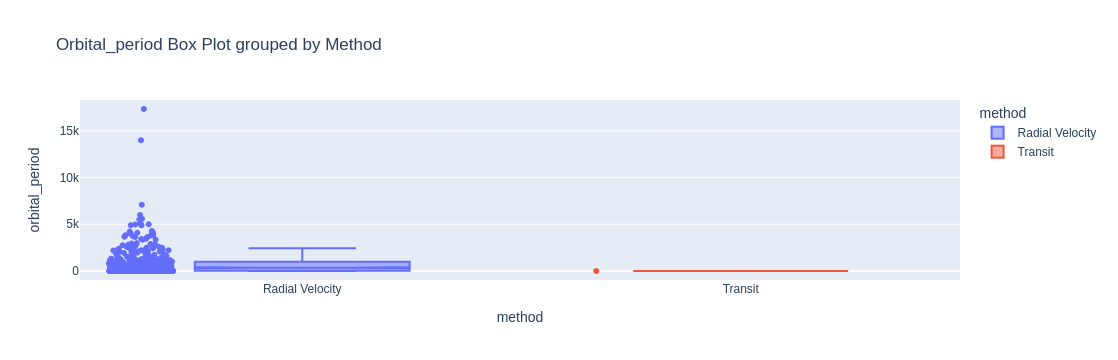

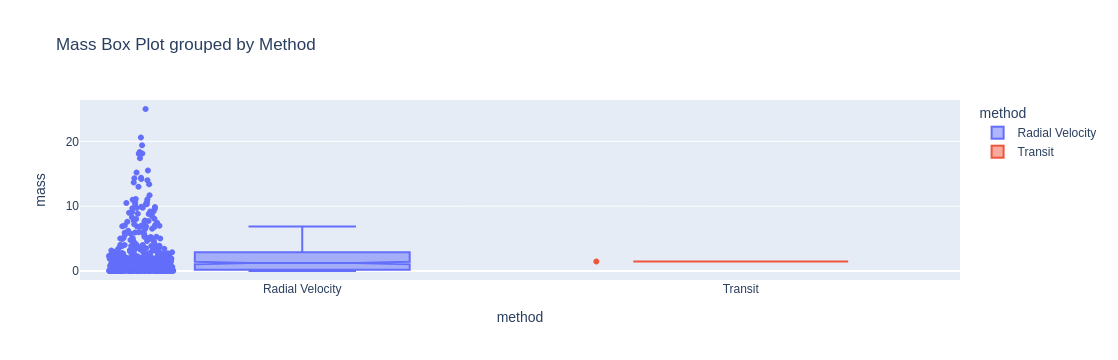

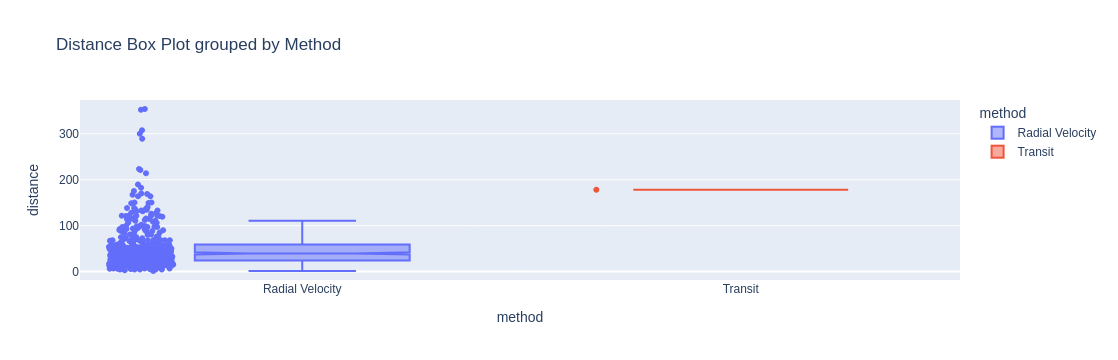

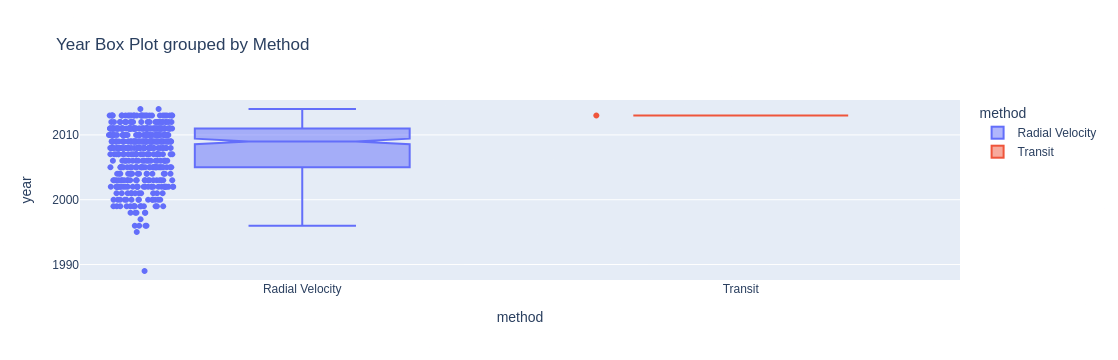

In [13]:
#Boxplot
categorical_cols= 'method'

for col in numeric_cols:
    fig = px.box(df,x=categorical_cols,y=col, points='all',color=categorical_cols,
                title=f'{col.capitalize()} Box Plot grouped by {categorical_cols.capitalize()}',
                notched=True)
    fig.update_layout(yaxis_title=col, xaxis_title=categorical_cols)
    fig.show()